**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# Comparing machine learning algorithms in music genre classification

## Abstract

Music genre is a label that describes the rhythm, pitch and timbre of the song among other things. This study revolves around a problem of trying to find as accurate as possible classificator for a data set containing thousands of songs from 10 different music genres. This study shows that Science Kit Learn library offers many ready algorithms that can be used for this classification task and found out that Linear Discriminant analysis with its 64% test accuracy was the most suitable of them for this task. The study also shows that with very imbalanced dataset as was used in this study, the classification accuracy of a genre depends on its representative proportion in the data set.

## 1. Introduction

This study was made during the (CS-E3210) Machine Learning Basic Principles -course under Aalto University. The task was to find the most accurate Machine Learning solution that predicts the genres of various songs. The dataset used in this study was a subset from the Million Song Dataset, and the labels were obtained from AllMusic.com. The task more precisely was to train a ML algorithm to predict a given songs music genre from the following label set:
1. 'Pop_Rock'
2. 'Electronic'
3. 'Rap'
4. 'Jazz'
5. 'Latin'
6. 'RnB'
7. 'International'
8. 'Country'
9. 'Reggae'
10. 'Blues'

This report discusses the accuracies of different Machine Learning algorithms and presents the implementation of the most accurate algorithm. The algorithms used to conduct this study were all from sklearn-library[2]. 

The given problem of automatically categorizing music genres is very useful for making recommendations for example based on mood or latest songs listened. This kind of algorithm would be (and probably is already) very useful for example Spotify or Itunes that have new songs added to their database every day and do new recommendations daily for their users.

However classifying music genre of a song is not a simple task. Firstly, classifying a music genre of a song is always a very subjective problem. For example two different people might classify the genre of same song differently. Secondly, many genres are very close to each other, no matter how objectively studying a song. It is very hard to draw a line between rock and blues for example.

## 2. Data analysis

For this classification study we were using two different data sets. The label data set was only given for training data containing 10 different labels of 4363 songs. The training data contained 4363 songs and the test data set 6544 songs. 
Every song   $\mathbf{x}^{(i)}$   was described by 264 components. 

Let's have a brief look at the components of a song below:

In [7]:
import pandas as pd

df2 = pd.read_csv("train_labels.csv", header=None)
label_data = df2.values

df = pd.read_csv("train_data.csv", header=None)
display(df.head(1))

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,1040.7,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.7,...,0.21649,0.36548,0.093584,0.16687,0.083426,0.11809,0.089792,0.074371,0.073162,0.059463


The 264 components of a song represent 3 different categories that describe the landscape of a song: timbre, pitch and rhythm.

## 2.1 Rhythm Pattern

The values $[\mathbf{x}^{(i)}_{0}, \mathbf{x}^{(i)}_{167}]$ describe the rhythm pattern of the song with 7 different statistics in 24 different bands. Rhythm Pattern e.g.[24x1024]) The statistics are:
- mean
- median
- variance
- kurtosis
- skewness
- min
- max

Let's have an example from the first songs first 7 rhythm pattern statistics:

In [8]:
import numpy as np
train_data =df.values
print(train_data[0,:7])

[1040.7 2315.6 2839.1 2552.2 2290.4 1913.8 2152.6]


Then let's plot all the first songs rhythm features:

In [9]:
import matplotlib.pyplot as plt
#
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize =(7,10))

means = train_data[0,:168:7]
median = train_data[0,1:168:7]
variance = train_data[0,2:168:7]
kurtosis = train_data[0,3:168:7]
skewness = train_data[0,4:168:7]
min_ = train_data[0,5:168:7]
max_ = train_data[0,6:168:7]
x = range(24)
ax1.plot(x, means, label = 'Rhythm pattern means', color = 'r')
ax1.set_xlabel('band')
ax1.set_ylabel('mean')

ax2.plot(x, median, label = 'Rhythm pattern medians', color = 'r')
ax2.set_xlabel('band')
ax2.set_ylabel('median')

ax3.plot(x, variance, label = 'Rhythm pattern variances', color = 'r')
ax3.set_xlabel('band')
ax3.set_ylabel('variance')

ax4.plot(x, kurtosis, label = 'Rhythm pattern kurtosis', color = 'r')
ax4.set_xlabel('band')
ax4.set_ylabel('kurtosis')

ax5.plot(x, skewness, label = 'Rhythm pattern skewness', color = 'r')
ax5.set_xlabel('band')
ax5.set_ylabel('skewness')

ax6.plot(x, min_, label = 'Rhythm pattern min', color = 'r')
ax6.set_xlabel('band')
ax6.set_ylabel('min')

ax7.plot(x, max_, label = 'Rhythm pattern max', color = 'r')
ax7.set_xlabel('band')
ax7.set_ylabel('max')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()

## 2.2. Bag of Frames for Chroma

The values $[\mathbf{x}^{(i)}_{168}, \mathbf{x}^{(i)}_{215}]$ represent the Bag of Frames for Chroma with 4 different statistics in 12 pitch classes. (Chroma eq[12x1200]) The statistics are:
- mean
- standard deviation
- min
- max

Let's have an example from the first songs first 4 chroma statistics:

In [10]:
print(train_data[0,168:172])

[0.53113 0.27914 0.291   0.18867]


## 2.3. Bag of Frames for MFCCs

The last values $[\mathbf{x}^{(i)}_{216}, \mathbf{x}^{(i)}_{263}]$ represent the Bag of Frames for MFCCs with 4 statistics in 12 coefficients. (MFCCs [12x1200]) The statistics are :
- mean
- standard deviation
- min
- max

Let's have an example from the first song's 4 MFCCs' statistics:

In [11]:
print(train_data[0,220:224])

[ 0.0018942 -0.0020002  0.0013012  0.0011586]


## 2.4. Form of feature data sets

Thus, we conclude that the training dataset is

$\mathbf{X}_{training} \in \mathbb{R}^{4363x264}$

and the test data set is 

$\mathbf{X}_{test} \in \mathbb{R}^{6544x264}$


## 2.5. Label Data set

The label data set is of form:

$\mathbf{Y}_{training} \in \mathbb{R}^{4363}$

and to get a touch on the labels, lets make a histogram of it below:

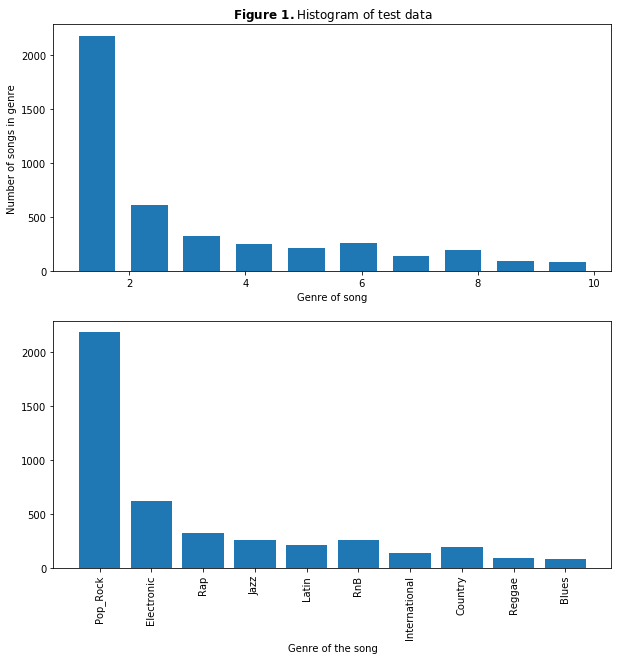

In [12]:
y_labels = ['Pop_Rock','Electronic','Rap','Jazz','Latin',
               'RnB','International','Country','Reggae','Blues']

#Plot histogram
plot_histogram(label_data, y_labels) #function in appendix

## 2.6. Weird data points

As can be seen from above, the datapoints for training are imbalanced. The number of songs in category "Pop-Rock" is accounts to roughly 50% of the whole data. This needs to be taken in to account in later on in the algorithms.

Also there are some anomalies in the dataset that are presented below:

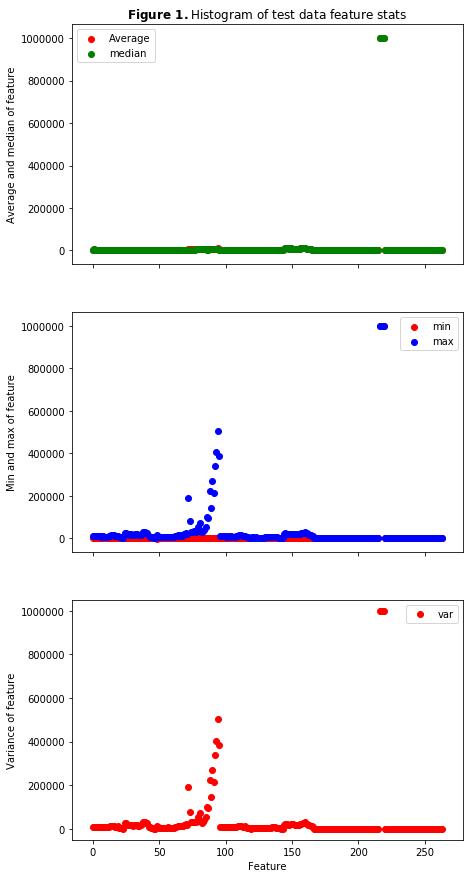

In [14]:
plot_stats(train_data) #function in appendix

*Figure 1.* shows mean and median of between same points in all songs. We can spot right away that there is some points in all or almost all of the songs that have significantly higher values than the rest since both mean and median of those points is so high. *Figure 2.* and *Figure 3.* show that there are some anomalies roughly at same points on every feature. Also there might be something wrong with features around indices [80,90]. These facts have to be considered later on while implementing the algorithms.

## 3. Methods and experiments

Our approach to the problem of finding the most accurate classifier was to experiment with different Python scikit-learn library's algorithms. Sklearn-library has broad range of different algorithms [1] that were yet unknown to us. However, their interfaces were simple to use, so we decided just go and see how they work for the classification problem. This section discusses briefly the results in comparison and then more in-depth about the most accurate algorithm.

## 3.1. Splitting data

First, we want to split the training dataset into train data and test data. This is an important step in order to avoid overfitting. We do this with the 'train_test_split' function and split the data randomly into 75% training set and 25% test set.

Then we do preprocessing for the feature data with Standardscaler. This standardizes features by removing the mean and scaling to unit variance. Some machine learning algorithms work only with standardised features. Usually, this also fastens the run-time of the algorithms.

Second, we try out nine different supervised machine learning classifiers for the given training data features and labels. These algorithms were chosen with basis that we can use a supervised classifier since we have a labeled test dataset. This will lead to better results in the end.
The algorithms are:
- LDA with Singular value decomposition,
- LDA with Least squares solution,
- Gaussian Naive Bayes,
- Quadratic Discriminant Analysis,
- K-Neighbors Classifier,
- Logistic Regression,
- K-Nearest Centroid,
- MLP Classifier and
- SGDClassifier.

Lastly, we try to predict the labels of the test set with the different trained classifiers and report the accuracy of the classifier. We used the accuracy metrics in order the compare the performance of the different classifiers and chose the classifier with best accuracy for the kaggle competition.

Detailed code is explained below.

#### First we want to import the libaries needed for this excercise. 

In [41]:
# Import libraries
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from math import exp

#### Libaries related to different supervised machine learning algorithms from Python sklearn libary.

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

#### Train_model function trains the model according to given training feature vector, labels and classifier. This function is used to try out different machine learning methods as classifiers.


#### Predict_labels function test the given classifier with a test dataset. The function returns the accuracy and the predictions of the classifier.

In [47]:
def calc_logloss(label_data, pred_probs, eps):
    N_val = label_data.shape[0]
    logloss = 0
    for i in range(N_val):
        logloss = logloss + np.log10(pred_probs[i,label_data[i]-1])
    logloss = -logloss/N_val
    logloss = np.exp(-1*logloss)
    #print(logloss)

def train_model(classifier, X, label_data, title):
    classifier.fit(X, label_data)
    acc = classifier.score(X, label_data)
    
    y_hat = classifier.predict_proba(X)
    logloss = log_loss(label_data,y_hat, eps = 1e-15)
    logloss = np.exp(-1*logloss)
    #logloss = calc_logloss(label_data,y_hat, eps = 1e-15)
    
    X_r2 = classifier.fit_transform(X, y)
    plot_scikit_lda(X_r2 ,label_data, title)
    
    return classifier, acc, logloss

#Try with test data
def predict_labels(classifier, X):
    accuracy = classifier.predict(X)
    print('Predicted labels for test_data', accuracy)
    y_hat = classifier.predict_proba(X)
    return accuracy, y_hat

#### Here we train different classifiers with the randomly selected train dataset and print the accuracy, how the classifier can predict the labels of the other random 25% of the test dataset.

In [49]:
X_train, X_test, train_labels, test_labels = train_test_split(train_data,
                                                          label_data,
                                                          test_size=0.25,
                                                          random_state=1,
                                                          shuffle = True)
y_train = train_labels.ravel()
X_train  = StandardScaler().fit_transform(X_train)

y_test = test_labels.ravel()
X_test  = StandardScaler().fit_transform(X_test)

#Try out different classifiers
classifiers = [LDA(solver='svd',n_components=10, tol=0.0001),
               LDA(solver='lsqr',n_components=10, tol=0.0001),
               GaussianNB(),
               QuadraticDiscriminantAnalysis(),
               KNeighborsClassifier(n_neighbors = 10, weights='distance'),
               LogisticRegression(solver = 'lbfgs', multi_class='multinomial', max_iter = 1000),
               NearestCentroid(metric='euclidean', shrink_threshold=None),
               MLPClassifier(solver='lbfgs', alpha=1e-5, 
                           hidden_layer_sizes=(5, 2), random_state=1),
               SGDClassifier(loss="log", alpha=0.001, penalty="l1", max_iter=1000, shuffle=True)]

clf_names = ['LDA svd','LDA lsqr','GaussianNB','QuadraticDiscriminantAnalysis',
             'KNeighborsClassifier', 'LogisticRegression', 'NearestCentroid',
             'MLPClassifier', 'SGDClassifier']

results = []
i = 0
for classifier in classifiers:
    model = classifier.fit(X_train, y_train)
    
    preds = classifier.predict(X_test)
    acc = accuracy_score(test_labels, preds)
    if i == 0:
        y_hat = classifier.predict_proba(X_test)
        logloss = log_loss(y_test,y_hat, eps=1e-15)
        logloss = np.exp(-1*logloss)
        #print('logloss is ', logloss)
        print(i, ': Prediction accuracy for', clf_names[i], ' is', round(acc,4), 'and log loss is', round(logloss,2))
    else:
        print(i, ': Prediction accuracy for', clf_names[i], ' is', round(acc,4))
    i +=1
    

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0 : Prediction accuracy for LDA svd  is 0.6434 and log loss is 0.27
1 : Prediction accuracy for LDA lsqr  is 0.6425
2 : Prediction accuracy for GaussianNB  is 0.44


/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


3 : Prediction accuracy for QuadraticDiscriminantAnalysis  is 0.5014
4 : Prediction accuracy for KNeighborsClassifier  is 0.5802
5 : Prediction accuracy for LogisticRegression  is 0.6251
6 : Prediction accuracy for NearestCentroid  is 0.4244
7 : Prediction accuracy for MLPClassifier  is 0.5188
8 : Prediction accuracy for SGDClassifier  is 0.6297


## 3.2 Choosing the best algorithm

As we can see above results that the linear discriminant analysis as classifier gives the best accuracy when predicting untrained data.

Testing the accuracy with an untrained dataset is very important for correct conclusions. We also tried the same classifiers by using the whole 'training dataset' for both training and testing. This lead to a result, for example where K-neighbours classifier showed an accuracy of 100% and the LDA an accuracy of 74% which is higher than the 64% that we got above. However, when submitting the results to the Kaggle, K-neighbour gave a worse result than linear discriminant analysis. This highlights the need of using different dataset for training and testing. Not doing this might lead to overfitting which would give us a misleading result.

LDA stands for Linear Discriminant Analysis, which can be categorised as a supervised learning algorithm. LDA is a classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix. The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions. [5] [3]

## 3.3 Predicting labels for test_data

The last part of this section shows want to submit our prediction to the Kaggle competition with the method that we found best. First we used the whole training dataset to train the linear discriminant analysis as classifier. Then we predicted the labels for the test_data which we then submitted to Kaggle.

Here below we show an example graph of the first two components of LDA in a scatter plot. The different colors show how different song genres fall into this scatter plot.

You can see that the first and second components are good at differentiating some of the genres. For example, red electronic, green rap and black jazz are all in different corners of the plot which means that the two components can be used to predict well the differences between electronic, rap and jazz. However, we can not see clearly all the 10 different colors which means shows that these two components are not enough to differentiate all the 10 different genres.


/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


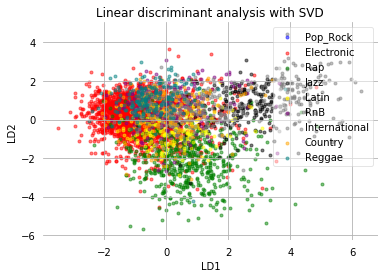

Prediction accuracy with LDA when using same train_data and test data 0.740087096035
Predicted logloss with LDA when using same train_data and test data 0.431219079425
Predicted labels for test_data [3 9 1 ..., 1 3 1]


In [48]:
# Use Linear discriminant analysis as classifier for the Kaggle competition
df = pd.read_csv("test_data.csv", header=None)
test_data =df.values

title='Linear discriminant analysis with SVD'
classifier = LDA(solver = 'svd', n_components=10, tol=0.0001)
X  = StandardScaler().fit_transform(train_data)
y = label_data.ravel()
classifier, acc, logloss = train_model(classifier, X, y, title)

print('Prediction accuracy with LDA when using same train_data and test data', acc)
print('Predicted logloss with LDA when using same train_data and test data', logloss)

X  = StandardScaler().fit_transform(test_data)
lda_accuracy, y_hat =predict_labels(classifier, X) #run plot_scikit_lda from appendix

#print('Shape of the logistic loss results are', y_hat.shape[0], 'x', y_hat.shape[1])

## 4. Results

Using linear discrimant analysis as classifier on 25 % of untrained part of the train_data: 
- Accuracy: 0.6434
- LogLoss: 0.27

The performance on kaggle is quite comparable with the results that we got with the train data. The result for kaggle 
- Accuracy: 0.64187
- LogLoss: 0.18576

Confusion matrix is calculated and shown below, where the true labels are the column headers and the predicted labels the row headers.

1. 'Pop_Rock'
2. 'Electronic'
3. 'Rap'
4. 'Jazz'
5. 'Latin'
6. 'RnB'
7. 'International'
8. 'Country'
9. 'Reggae'
10. 'Blues'

In [32]:
#run genre from appendix
c_matrix = np.zeros([10,10])
sum_ = 0
for i in range(len(y_test)):
    c_matrix[y_test[i]-1][preds[i]-1]+=1
    sum_+=1

print('Confusion matrix:')
print(c_matrix.astype(int))
print("Number of songs: ", sum_ )

print("Label:       ", "        % correct")
for i in range(10):
    r_cell = c_matrix[i,i]/np.sum(c_matrix[:,i])
    print(genre(i+1),"       " ,"%.2f" % (r_cell))

print("\nTotal number of songs in this subset of training data: ", np.sum(c_matrix),"\n")

print("RAP total: ", np.sum(c_matrix[:,1]))
print("Blues total: ", np.sum(c_matrix[:,9]))
print("POP_ROCK total: ", np.sum(c_matrix[:,0]))
print("Jazz total: ", np.sum(c_matrix[:, 2]))

Confusion matrix:
[[462  18   4   5   6   6   4  18   3   2]
 [ 48  79   7   4   2   1   0   0   2   0]
 [ 17   2  61   1   0   3   1   0   1   0]
 [ 23   5   2  31   1   4   1   0   1   0]
 [ 24   3   0   3   7   4   5   2   5   3]
 [ 42   4   4   5   0  14   3   2   2   1]
 [ 20   2   1   1   4   0   3   1   2   1]
 [ 29   1   1   0   1   1   0  10   0   1]
 [ 12   2   2   0   1   1   1   0   7   2]
 [ 16   1   0   0   1   1   0   3   0   4]]
Number of songs:  1091
Label:                % correct
genre.Pop_Rock         0.67
genre.Electronic         0.68
genre.Rap         0.74
genre.Jazz         0.62
genre.Latin         0.30
genre.RnB         0.40
genre.International         0.17
genre.Country         0.28
genre.Reggae         0.30
genre.Blues         0.29

Total number of songs in this subset of training data:  1091.0 

RAP total:  117.0
Blues total:  14.0
POP_ROCK total:  693.0
Jazz total:  82.0


## 5. Discussion/Conclusions

The goal of this study was to find the best music genre classificator for songs and to research what makes it the best. There was eight different algorithms that we tested and the result was that Linear Discriminant Analysis was the most accurate with more than 64% accuracy. It seems that LDA works well with datasets that have a lot of features and labels. This is because LDA is a supervised way of dimensionality reduction of the feature vectors. We had a broad training data set with given labels which allowed us to use a supervised method.

### 5.1 Imbalanced training dataset
It seems that the smaller the representation of the music genre had in the feature data set, the worse the trained algorithm was at classifying the songs in the genre. For example in our subset of training data that had 123 songs of Rap and only 9 songs of Blues, the accuracy of recognising Rap was 75%, but Blueses was only 22%. Also the subset included 705 songs of Pop_rock genre under and the classification accuracy for this genre 65%.

### 5.2 Comparing LDA to literature
Linear Discriminant Analyisis is widely used when dimension reduction is needed.[3] In literature were presented some even more accurate ways to classify music genres than the one we used. For example using K-nearest-neighbours algorithm after reducing the dimensions was found to result in an accuracy of roughly 80%. [4] This study was conducted with very much smaller datasets, both feature and label -wise.

### 5.3 Suggestions for research / improvement
Next things to try with the same problem setting would be to try and train the algorithms with balanced data. Also another interesting research area would be to try more combinations with the data. For example using PCA first and then LDA and KNN as was done in [4].


## 6. References

1. Science Kit http://scikit-learn.org/stable/index.html
2. Assignment and data description. https://mycourses.aalto.fi/pluginfile.php/743413/mod_resource/content/14/MLBP%202018%20project%20description.pdf 
3. Sebastian Raschka, 2014, Linear Discriminant Analysis - bit by bit https://sebastianraschka.com/Articles/2014_python_lda.html
4. Roman Bogdanowski, Automatic Genre Classification Of Audio Signals Using Fisher's Linear Discriminant Analysis http://people.bu.edu/romanb/GenreRecognitionReport.pdf
5. Science Kit LDA documentation http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

## Appendix

The function below is used to plot the scatter "Linear discriminant analysis with SVD".

In [4]:
""" VISUALIZE THE DATA """

def plot_scikit_lda(X,y, title): #tätä käytetään ylhäällä
    label_dict = ['Pop_Rock',
               'Electronic',
               'Rap',
               'Jazz',
               'Latin',
               'RnB',
               'International',
               'Country',
               'Reggae',
               'Blues']
    
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,9),
        ('.', '.', '.','.','.','.','.','.','.','.'),
        ('blue', 'red', 'green','black','yellow','purple','grey','orange','teal','pink')):
        
        indx_1 = np.where(y == label) # for Specific label.
        plt.scatter(x=X[indx_1,0],
                    y=X[indx_1,1],
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()


In [3]:
def plot_histogram(X, x_labels):
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
    counts, bins, patches = ax1.hist(X, rwidth=0.7)
    #ax.set_xticks(bins)
    ax1.set_xlabel('Genre of song')
    ax1.set_ylabel('Number of songs in genre')
    ax1.set_title(r'$\bf{Figure\ 1.}$Histogram of test data')
    
    y = [0, 0, 0, 0, 0, 0, 0, 0,0,0]
    for i in range(len(counts)):
        y[i] = counts[i]
    
    x = np.arange(10)
    ax2.bar(x, y, align='center', tick_label=x_labels)
    ax2.set_xlabel('Genre of the song')
    plt.xticks(rotation=90)
    
    
    
def plot_stats(data):
    d = data.shape[1]
    y = np.zeros((d,5))
    for j in range(0,d):
        col_data = data[:,j]
        #print(j)
        #print(y)
        y[j,0] = np.average(col_data)
        y[j,1] = np.min(col_data)
        y[j,2] = np.max(col_data)
        y[j,3] = np.median(col_data)
        y[j,4] = np.var(col_data)
    
    x = np.arange(0,data.shape[1],1)
    
    fig, (ax1, ax2,ax3) = plt.subplots(3, 1, sharex=True, figsize =(7,15))
    ax3.set_xlabel('Feature')
    
    ax1.scatter(x, y[:,0], label = 'Average', color = 'r')
    ax1.scatter(x, y[:,3], label = 'median', color = 'g')
    ax1.set_ylabel('Average and median of feature')
    
    ax2.scatter(x, y[:,1], label = 'min', color = 'r')
    ax2.scatter(x, y[:,2], label = 'max', color = 'b')
    ax2.set_ylabel('Min and max of feature')
    
    ax3.scatter(x, y[:,2], label = 'var', color = 'r')
    ax3.set_ylabel('Variance of feature')
    
    ax1.set_title(r'$\bf{Figure\ 1.}$Histogram of test data feature stats')
    ax1.legend()
    ax2.legend()
    ax3.legend()

This was used to write the results in to .csv to participate in the Kaggle competition.

In [5]:
#Write submission files for accuracy competition and logloss competition.
import csv 
with open('accuracy_48.csv', mode='w') as csv_file:
    fieldnames = ['Sample_id', 'Sample_label']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(0, 6544):
        writer.writerow({'Sample_id': int(i+1), 'Sample_label': int(lda_accuracy[i])})
        
with open('logloss_48.csv', mode='w') as csv_file:
    fieldnames = ['Sample_id', 'Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9', 'Class_10']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(0, 6544):
        writer.writerow({'Sample_id': int(i+1), 'Class_1': y_hat[i,0]
                         , 'Class_2': y_hat[i,1]
                         , 'Class_3': y_hat[i,2]
                         , 'Class_4': y_hat[i,3]
                         , 'Class_5': y_hat[i,4]
                         , 'Class_6': y_hat[i,5]
                         , 'Class_7': y_hat[i,6]
                         , 'Class_8': y_hat[i,7]
                         , 'Class_9': y_hat[i,8]
                         , 'Class_10': y_hat[i,9]})


NameError: name 'lda_accuracy' is not defined

Small enumeration trick for printing out results in part 4.

In [6]:
from enum import Enum
class genre(Enum):
    Pop_Rock = 1
    Electronic = 2
    Rap = 3
    Jazz = 4
    Latin = 5
    RnB = 6
    International = 7
    Country = 8
    Reggae = 9
    Blues = 10